In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          
%matplotlib inline                       
from sklearn import preprocessing     #for normalzing data

In [290]:
dottadata_train=pd.read_csv("D:/analytics/Hackathon/IIT_Hyd_Kings_Of_ML/dotta_train91.csv")

In [291]:
dottadata_train.head()

,user_id,id,num_games,num_wins,kda_ratio,hero_id,primary_attr,attack_type,roles,base_health,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,1_41,201,125,3731.707317,41,agi,Melee,Carry:Initiator:Disabler:Escape:Durable,200,...,23,15,2.1,2.8,1.5,150,900,1.7,295,1.0
1,1,1_74,304,185,3743.699732,74,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher,200,...,14,16,2.2,1.9,4.0,600,900,1.7,280,0.5
2,1,1_65,255,151,4009.021513,65,int,Ranged,Initiator:Jungler:Disabler:Escape,200,...,15,24,2.7,1.5,2.5,375,900,1.7,290,1.0
3,1,1_39,203,135,5094.621514,39,int,Ranged,Carry:Nuker:Escape,200,...,18,24,2.0,2.0,2.5,550,1500,1.5,295,0.5
4,1,1_106,158,106,4619.212963,106,agi,Melee,Carry:Escape:Nuker:Disabler:Initiator,200,...,22,20,2.1,1.8,1.8,150,900,1.7,305,0.5


In [292]:
(dottadata_train.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

turn_rate                0
move_speed               0
id                       0
num_games                0
num_wins                 0
kda_ratio                0
hero_id                  0
primary_attr             0
attack_type              0
roles                    0
base_health              0
base_health_regen        0
base_mana                0
base_mana_regen          0
base_armor               0
base_magic_resistance    0
base_attack_min          0
base_attack_max          0
base_strength            0
base_agility             0
base_intelligence        0
strength_gain            0
agility_gain             0
intelligence_gain        0
attack_range             0
projectile_speed         0
attack_rate              0
user_id                  0
dtype: int64

In [293]:
dottadata_trainnum=dottadata_train.select_dtypes(include=[np.number]) # strategy 1 split the data frame into numeric and character data frame and values
dottadata_traincat=dottadata_train.select_dtypes(include=[object])

In [294]:
dottadata_trainnum.head()

,user_id,num_games,num_wins,kda_ratio,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,201,125,3731.707317,41,200,2.00,75,0.9,0.0,...,23,15,2.1,2.8,1.5,150,900,1.7,295,1.0
1,1,304,185,3743.699732,74,200,1.50,75,0.9,-1.0,...,14,16,2.2,1.9,4.0,600,900,1.7,280,0.5
2,1,255,151,4009.021513,65,200,3.25,75,0.9,0.0,...,15,24,2.7,1.5,2.5,375,900,1.7,290,1.0
3,1,203,135,5094.621514,39,200,1.50,75,0.9,-1.0,...,18,24,2.0,2.0,2.5,550,1500,1.5,295,0.5
4,1,158,106,4619.212963,106,200,2.00,75,0.9,-2.0,...,22,20,2.1,1.8,1.8,150,900,1.7,305,0.5


In [295]:
dottadata_trainnum['kda_ratio'].corr(dottadata_trainnum['move_speed'])


0.006877498339979045

In [296]:
dottadata_trainnum.corr()

,user_id,num_games,num_wins,kda_ratio,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
user_id,1.000000e+00,-7.843046e-02,-6.732172e-02,1.721698e-01,-2.035013e-02,NaN,-6.008739e-03,NaN,1.922899e-13,-3.133014e-02,...,5.099154e-02,1.648491e-02,-5.193819e-02,1.299451e-02,9.095069e-03,2.783001e-03,-1.157722e-02,-4.228931e-02,7.506419e-03,2.307701e-02
num_games,-7.843046e-02,1.000000e+00,9.912075e-01,-3.309344e-02,2.899823e-02,NaN,-5.214486e-02,NaN,1.240714e-14,-2.929253e-02,...,-6.136342e-02,-1.229917e-05,4.413034e-03,-4.297556e-02,9.145508e-02,6.772155e-02,-3.215016e-03,2.197483e-02,-6.545883e-02,1.164659e-02
num_wins,-6.732172e-02,9.912075e-01,1.000000e+00,6.775431e-03,3.414784e-02,NaN,-4.985763e-02,NaN,7.751990e-15,-1.941962e-02,...,-5.318072e-02,-2.104630e-03,4.331227e-03,-4.179608e-02,8.179120e-02,5.661084e-02,-2.689793e-03,2.565085e-02,-6.091487e-02,6.085258e-03
kda_ratio,1.721698e-01,-3.309344e-02,6.775431e-03,1.000000e+00,-8.518743e-03,NaN,-3.823048e-02,NaN,5.323712e-15,-4.650736e-02,...,2.071067e-01,-5.504312e-02,-1.661536e-01,1.168153e-01,-5.013995e-02,-4.030402e-02,9.553409e-03,-1.237754e-01,6.877498e-03,-7.425627e-02
hero_id,-2.035013e-02,2.899823e-02,3.414784e-02,-8.518743e-03,1.000000e+00,NaN,9.249975e-02,NaN,-3.640743e-15,1.759642e-02,...,-1.448877e-01,1.630758e-01,3.827733e-02,-2.153939e-01,1.473654e-01,-1.068740e-01,1.450002e-01,3.260747e-01,8.475766e-02,-2.691500e-01
base_health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
base_health_regen,-6.008739e-03,-5.214486e-02,-4.985763e-02,-3.823048e-02,9.249975e-02,NaN,1.000000e+00,NaN,1.840547e-15,1.701251e-01,...,6.948276e-02,-9.041782e-02,1.285465e-01,1.268578e-01,-1.699862e-01,-2.687135e-01,-3.584496e-02,-4.660576e-02,3.915666e-02,6.293540e-02
base_mana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
base_mana_regen,1.922899e-13,1.240714e-14,7.751990e-15,5.323712e-15,-3.640743e-15,NaN,1.840547e-15,NaN,1.000000e+00,-7.850453e-16,...,-4.609086e-15,1.764346e-15,-7.728824e-14,-2.308724e-13,-7.503144e-14,1.041775e-15,1.267723e-15,-2.543918e-12,5.271109e-16,-3.559313e-13
base_armor,-3.133014e-02,-2.929253e-02,-1.941962e-02,-4.650736e-02,1.759642e-02,NaN,1.701251e-01,NaN,-7.850453e-16,1.000000e+00,...,-6.733740e-02,1.146011e-01,1.853199e-01,-1.310010e-01,-2.553689e-02,-2.727989e-01,-7.391504e-02,9.998307e-02,5.309903e-02,-1.945143e-02


In [297]:
dottadata_traincat.head()

,id,primary_attr,attack_type,roles
0,1_41,agi,Melee,Carry:Initiator:Disabler:Escape:Durable
1,1_74,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher
2,1_65,int,Ranged,Initiator:Jungler:Disabler:Escape
3,1_39,int,Ranged,Carry:Nuker:Escape
4,1_106,agi,Melee,Carry:Escape:Nuker:Disabler:Initiator


In [298]:
dottadata_trainnum.shape

(20940, 24)

In [299]:
dottadata_traincat.shape

(20940, 4)

In [300]:
dottadataid=pd.concat([dottadata_trainnum[["user_id","hero_id","kda_ratio"]],dottadata_traincat[["id"]]],axis=1)

In [301]:
dottadataid.head()

,user_id,hero_id,kda_ratio,id
0,1,41,3731.707317,1_41
1,1,74,3743.699732,1_74
2,1,65,4009.021513,1_65
3,1,39,5094.621514,1_39
4,1,106,4619.212963,1_106


In [302]:
dottadata_trainnum=dottadata_trainnum.drop(["user_id","hero_id","kda_ratio"],axis=1)

In [303]:
dottadata_trainnum.head()

,num_games,num_wins,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,201,125,200,2.00,75,0.9,0.0,25,33,39,...,23,15,2.1,2.8,1.5,150,900,1.7,295,1.0
1,304,185,200,1.50,75,0.9,-1.0,25,19,25,...,14,16,2.2,1.9,4.0,600,900,1.7,280,0.5
2,255,151,200,3.25,75,0.9,0.0,25,14,18,...,15,24,2.7,1.5,2.5,375,900,1.7,290,1.0
3,203,135,200,1.50,75,0.9,-1.0,25,21,29,...,18,24,2.0,2.0,2.5,550,1500,1.5,295,0.5
4,158,106,200,2.00,75,0.9,-2.0,25,30,34,...,22,20,2.1,1.8,1.8,150,900,1.7,305,0.5


In [304]:
dottadata_traincat=dottadata_traincat.drop(["id"],axis=1)

In [305]:
dottadata_traincat.head()

,primary_attr,attack_type,roles
0,agi,Melee,Carry:Initiator:Disabler:Escape:Durable
1,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher
2,int,Ranged,Initiator:Jungler:Disabler:Escape
3,int,Ranged,Carry:Nuker:Escape
4,agi,Melee,Carry:Escape:Nuker:Disabler:Initiator


In [306]:
from sklearn.preprocessing import LabelEncoder

In [307]:
le=LabelEncoder()

In [308]:
dottadata_traincat1=dottadata_traincat.apply(le.fit_transform)

In [309]:
dottadata_traincat1.head()

,primary_attr,attack_type,roles
0,0,0,24
1,1,1,31
2,1,1,64
3,1,1,33
4,0,0,18


In [310]:
dottadata_traincat1=pd.DataFrame(preprocessing.normalize(dottadata_traincat1),columns = dottadata_traincat1.columns)

In [311]:
dottadata_traincat1.head()

,primary_attr,attack_type,roles
0,0.000000,0.000000,1.000000
1,0.032225,0.032225,0.998961
2,0.015621,0.015621,0.999756
3,0.030275,0.030275,0.999083
4,0.000000,0.000000,1.000000


In [312]:
dottadata_trainnum1=pd.DataFrame(preprocessing.normalize(dottadata_trainnum),columns = dottadata_trainnum.columns)

In [313]:
dottadata_trainnum1.head()

,num_games,num_wins,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,0.198464,0.123423,0.197477,0.001975,0.074054,0.000889,0.000000,0.024685,0.032584,0.038508,...,0.022710,0.014811,0.002074,0.002765,0.001481,0.148108,0.888646,0.001679,0.291278,0.000987
1,0.254841,0.155084,0.167658,0.001257,0.062872,0.000754,-0.000838,0.020957,0.015928,0.020957,...,0.011736,0.013413,0.001844,0.001593,0.003353,0.502975,0.754462,0.001425,0.234722,0.000419
2,0.235679,0.139559,0.184846,0.003004,0.069317,0.000832,0.000000,0.023106,0.012939,0.016636,...,0.013863,0.022182,0.002495,0.001386,0.002311,0.346587,0.831808,0.001571,0.268027,0.000924
3,0.122466,0.081443,0.120656,0.000905,0.045246,0.000543,-0.000603,0.015082,0.012669,0.017495,...,0.010859,0.014479,0.001207,0.001207,0.001508,0.331803,0.904918,0.000905,0.177967,0.000302
4,0.157115,0.105406,0.198880,0.001989,0.074580,0.000895,-0.001989,0.024860,0.029832,0.033810,...,0.021877,0.019888,0.002088,0.001790,0.001790,0.149160,0.894958,0.001690,0.303291,0.000497


In [314]:
dottadatadf=pd.concat([dottadataid,dottadata_trainnum1,dottadata_traincat1],axis=1)

In [315]:
dottadatadf.head()

,user_id,hero_id,kda_ratio,id,num_games,num_wins,base_health,base_health_regen,base_mana,base_mana_regen,...,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate,primary_attr,attack_type,roles
0,1,41,3731.707317,1_41,0.198464,0.123423,0.197477,0.001975,0.074054,0.000889,...,0.002765,0.001481,0.148108,0.888646,0.001679,0.291278,0.000987,0.000000,0.000000,1.000000
1,1,74,3743.699732,1_74,0.254841,0.155084,0.167658,0.001257,0.062872,0.000754,...,0.001593,0.003353,0.502975,0.754462,0.001425,0.234722,0.000419,0.032225,0.032225,0.998961
2,1,65,4009.021513,1_65,0.235679,0.139559,0.184846,0.003004,0.069317,0.000832,...,0.001386,0.002311,0.346587,0.831808,0.001571,0.268027,0.000924,0.015621,0.015621,0.999756
3,1,39,5094.621514,1_39,0.122466,0.081443,0.120656,0.000905,0.045246,0.000543,...,0.001207,0.001508,0.331803,0.904918,0.000905,0.177967,0.000302,0.030275,0.030275,0.999083
4,1,106,4619.212963,1_106,0.157115,0.105406,0.198880,0.001989,0.074580,0.000895,...,0.001790,0.001790,0.149160,0.894958,0.001690,0.303291,0.000497,0.000000,0.000000,1.000000


In [316]:
dottadatadf.shape

(20940, 28)

In [317]:
(dottadatadf.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

roles                    0
attack_type              0
hero_id                  0
kda_ratio                0
id                       0
num_games                0
num_wins                 0
base_health              0
base_health_regen        0
base_mana                0
base_mana_regen          0
base_armor               0
base_magic_resistance    0
base_attack_min          0
base_attack_max          0
base_strength            0
base_agility             0
base_intelligence        0
strength_gain            0
agility_gain             0
intelligence_gain        0
attack_range             0
projectile_speed         0
attack_rate              0
move_speed               0
turn_rate                0
primary_attr             0
user_id                  0
dtype: int64

In [318]:
dottadatadf.head().transpose()

,0,1,2,3,4
user_id,1,1,1,1,1
hero_id,41,74,65,39,106
kda_ratio,3731.71,3743.7,4009.02,5094.62,4619.21
id,1_41,1_74,1_65,1_39,1_106
num_games,0.198464,0.254841,0.235679,0.122466,0.157115
num_wins,0.123423,0.155084,0.139559,0.0814426,0.105406
base_health,0.197477,0.167658,0.184846,0.120656,0.19888
base_health_regen,0.00197477,0.00125744,0.00300375,0.000904918,0.0019888
base_mana,0.0740538,0.0628719,0.0693173,0.0452459,0.0745799
base_mana_regen,0.000888646,0.000754462,0.000831808,0.000542951,0.000894958


In [319]:
y=dottadatadf.kda_ratio
X=dottadatadf.drop(["user_id","hero_id","id","kda_ratio","num_wins","base_health", "base_health_regen", "base_mana","base_mana_regen", "base_magic_resistance","base_strength", "base_intelligence", "strength_gain", "intelligence_gain", "attack_rate","move_speed", "turn_rate", "roles","base_armor","base_attack_max"],axis=1)

In [320]:
X.head()

,num_games,base_attack_min,base_agility,agility_gain,attack_range,projectile_speed,primary_attr,attack_type
0,0.198464,0.032584,0.022710,0.002765,0.148108,0.888646,0.000000,0.000000
1,0.254841,0.015928,0.011736,0.001593,0.502975,0.754462,0.032225,0.032225
2,0.235679,0.012939,0.013863,0.001386,0.346587,0.831808,0.015621,0.015621
3,0.122466,0.012669,0.010859,0.001207,0.331803,0.904918,0.030275,0.030275
4,0.157115,0.029832,0.021877,0.001790,0.149160,0.894958,0.000000,0.000000


In [321]:
X.columns

Index(['num_games', 'base_attack_min', 'base_agility', 'agility_gain',
       'attack_range', 'projectile_speed', 'primary_attr', 'attack_type'],
      dtype='object')

In [322]:
from sklearn.tree import DecisionTreeRegressor   #Decision tree

In [323]:
DecTree=DecisionTreeRegressor()

In [324]:
DecTree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [325]:
DecTreepredict=DecTree.predict(X)

In [326]:
DecTreeresidual=y-DecTreepredict

In [327]:
np.sqrt(np.mean((DecTreeresidual)**2))

96.045587821248091

In [328]:
DecTree.score(X,y)

0.99200205508503259

In [158]:
from sklearn.linear_model import LinearRegression   # training data

In [159]:
LinReg=LinearRegression()

In [160]:
LinReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
LinReg.score(X,y)

0.055589894216655056

In [41]:
dottadatapredict=LinReg.predict(X)

In [42]:
dottadataresidual=y-dottadatapredict

In [43]:
np.sqrt(np.mean((dottadataresidual)**2))  # root mean square error

936.5442137605562

In [329]:
from sklearn.ensemble import RandomForestRegressor   #Random Forest

In [330]:
Randfor=RandomForestRegressor(n_estimators=500)

In [331]:
Randfor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [332]:
Randfor.score(X,y)

0.89673701808543893

In [333]:
Randforpredict=Randfor.predict(X)

In [334]:
importances = Randfor.feature_importances_   ## from here to see impt features

In [335]:
std = np.std([tree.feature_importances_ for tree in Randfor.estimators_],
             axis=0)

In [336]:
indices = np.argsort(importances)[::-1]

In [337]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.282301)
2. feature 1 (0.121630)
3. feature 3 (0.112382)
4. feature 2 (0.108401)
5. feature 4 (0.101478)
6. feature 5 (0.096337)
7. feature 7 (0.091360)
8. feature 6 (0.086111)


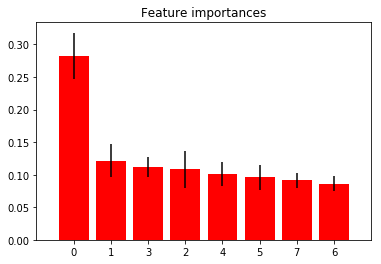

In [338]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [339]:
randforresidual=y-Randforpredict

In [340]:
np.sqrt(np.mean((randforresidual)**2))    #logorathmic error

345.11238539306981

In [186]:
from sklearn.ensemble import GradientBoostingRegressor

In [195]:
gbm = GradientBoostingRegressor().fit(X,y)

In [196]:
gbm.score(X,y)

0.42092834111962418

In [197]:
gbmpredict=gbm.predict(X)

In [198]:
gbmresidual=y-gbmpredict

In [199]:
np.sqrt(np.mean((gbmresidual)**2))  # root mean square error

817.24894681607691

In [200]:
# feature importance
print(gbm.feature_importances_)

[ 0.1833271   0.00266975  0.03743584  0.0030424   0.00108696  0.05253796
  0.00632044  0.05772334  0.01695371  0.03186816  0.05145049  0.03754451
  0.06145816  0.06972855  0.03391065  0.04541961  0.02204261  0.02041033
  0.00997014  0.04651476  0.05740466  0.0803277   0.07085218]


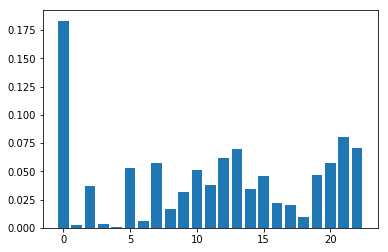

In [201]:
# plot
plt.bar(range(len(gbm.feature_importances_)), gbm.feature_importances_)
plt.show()

In [341]:
dottadata_train_test=pd.read_csv("D:/analytics/Hackathon/IIT_Hyd_Kings_Of_ML/dotta_test91.csv")

In [342]:
dottadata_train_test.head()

,user_id,id,num_games,num_wins,kda_ratio,hero_id,primary_attr,attack_type,roles,base_health,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,3,3_65,330,183,3418.470419,65,int,Ranged,Initiator:Jungler:Disabler:Escape,200,...,15,24,2.7,1.5,2.5,375,900,1.7,290,1.0
1,3,3_104,231,107,2522.639069,104,str,Melee,Carry:Disabler:Initiator:Durable:Nuker,200,...,18,20,2.9,1.7,2.2,150,900,1.7,320,0.5
2,3,3_7,200,103,2793.255132,7,str,Melee,Support:Initiator:Disabler:Nuker,200,...,12,16,3.2,1.4,1.8,150,0,1.7,310,0.9
3,3,3_19,189,91,3493.495230,19,str,Melee,Carry:Nuker:Pusher:Initiator:Durable:Disabler,200,...,0,17,3.3,0.0,1.6,150,900,1.7,285,0.5
4,3,3_4,182,102,3586.402266,4,agi,Melee,Carry:Disabler:Jungler:Nuker:Initiator,200,...,24,18,2.7,3.0,1.7,150,900,1.7,285,0.5


In [343]:

(dottadata_train_test.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

turn_rate                0
move_speed               0
id                       0
num_games                0
num_wins                 0
kda_ratio                0
hero_id                  0
primary_attr             0
attack_type              0
roles                    0
base_health              0
base_health_regen        0
base_mana                0
base_mana_regen          0
base_armor               0
base_magic_resistance    0
base_attack_min          0
base_attack_max          0
base_strength            0
base_agility             0
base_intelligence        0
strength_gain            0
agility_gain             0
intelligence_gain        0
attack_range             0
projectile_speed         0
attack_rate              0
user_id                  0
dtype: int64

In [344]:
dottadata_trainnum_test=dottadata_train_test.select_dtypes(include=[np.number]) # strategy 1 split the data frame into numeric and character data frame and values
dottadata_traincat_test=dottadata_train_test.select_dtypes(include=[object])

In [345]:
dottadata_trainnum_test.head()

,user_id,num_games,num_wins,kda_ratio,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,3,330,183,3418.470419,65,200,3.25,75,0.9,0.0,...,15,24,2.7,1.5,2.5,375,900,1.7,290,1.0
1,3,231,107,2522.639069,104,200,1.50,75,0.9,0.0,...,18,20,2.9,1.7,2.2,150,900,1.7,320,0.5
2,3,200,103,2793.255132,7,200,2.00,75,0.9,1.0,...,12,16,3.2,1.4,1.8,150,0,1.7,310,0.9
3,3,189,91,3493.495230,19,200,2.50,75,0.9,0.0,...,0,17,3.3,0.0,1.6,150,900,1.7,285,0.5
4,3,182,102,3586.402266,4,200,1.50,75,0.9,0.0,...,24,18,2.7,3.0,1.7,150,900,1.7,285,0.5


In [346]:
dottadata_traincat_test.head()

,id,primary_attr,attack_type,roles
0,3_65,int,Ranged,Initiator:Jungler:Disabler:Escape
1,3_104,str,Melee,Carry:Disabler:Initiator:Durable:Nuker
2,3_7,str,Melee,Support:Initiator:Disabler:Nuker
3,3_19,str,Melee,Carry:Nuker:Pusher:Initiator:Durable:Disabler
4,3_4,agi,Melee,Carry:Disabler:Jungler:Nuker:Initiator


In [347]:
dottadataid_test=pd.concat([dottadata_trainnum_test[["user_id","hero_id","kda_ratio"]],dottadata_traincat_test[["id"]]],axis=1)

In [348]:
dottadataid_test.head()

,user_id,hero_id,kda_ratio,id
0,3,65,3418.470419,3_65
1,3,104,2522.639069,3_104
2,3,7,2793.255132,3_7
3,3,19,3493.495230,3_19
4,3,4,3586.402266,3_4


In [349]:
dottadata_trainnum_test=dottadata_trainnum_test.drop(["user_id","hero_id","kda_ratio"],axis=1)

In [350]:
dottadata_traincat_test=dottadata_traincat_test.drop(["id"],axis=1)

In [351]:
dottadata_trainnum_test.head()

,num_games,num_wins,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,330,183,200,3.25,75,0.9,0.0,25,14,18,...,15,24,2.7,1.5,2.5,375,900,1.7,290,1.0
1,231,107,200,1.50,75,0.9,0.0,25,35,39,...,18,20,2.9,1.7,2.2,150,900,1.7,320,0.5
2,200,103,200,2.00,75,0.9,1.0,25,24,34,...,12,16,3.2,1.4,1.8,150,0,1.7,310,0.9
3,189,91,200,2.50,75,0.9,0.0,25,44,50,...,0,17,3.3,0.0,1.6,150,900,1.7,285,0.5
4,182,102,200,1.50,75,0.9,0.0,25,33,39,...,24,18,2.7,3.0,1.7,150,900,1.7,285,0.5


In [352]:
dottadata_traincat_test.head()

,primary_attr,attack_type,roles
0,int,Ranged,Initiator:Jungler:Disabler:Escape
1,str,Melee,Carry:Disabler:Initiator:Durable:Nuker
2,str,Melee,Support:Initiator:Disabler:Nuker
3,str,Melee,Carry:Nuker:Pusher:Initiator:Durable:Disabler
4,agi,Melee,Carry:Disabler:Jungler:Nuker:Initiator


In [353]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [354]:
dottadata_traincat_test1=dottadata_traincat_test.apply(le.fit_transform)

In [355]:
dottadata_traincat_test1.head()

,primary_attr,attack_type,roles
0,1,1,64
1,2,0,2
2,2,0,82
3,2,0,35
4,0,0,3


In [356]:
dottadata_traincat_test1=pd.DataFrame(preprocessing.normalize(dottadata_traincat_test1),columns = dottadata_traincat_test1.columns)

In [357]:
dottadata_traincat_test1.head()

,primary_attr,attack_type,roles
0,0.015621,0.015621,0.999756
1,0.707107,0.000000,0.707107
2,0.024383,0.000000,0.999703
3,0.057050,0.000000,0.998371
4,0.000000,0.000000,1.000000


In [358]:
dottadata_trainnum_test1=pd.DataFrame(preprocessing.normalize(dottadata_trainnum_test),columns = dottadata_trainnum_test.columns)

In [359]:
dottadata_trainnum_test1.head()

,num_games,num_wins,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,0.298128,0.165325,0.180684,0.002936,0.067756,0.000813,0.000000,0.022585,0.012648,0.016262,...,0.013551,0.021682,0.002439,0.001355,0.002259,0.338782,0.813076,0.001536,0.261991,0.000903
1,0.225419,0.104415,0.195168,0.001464,0.073188,0.000878,0.000000,0.024396,0.034154,0.038058,...,0.017565,0.019517,0.002830,0.001659,0.002147,0.146376,0.878256,0.001659,0.312269,0.000488
2,0.428255,0.220551,0.428255,0.004283,0.160596,0.001927,0.002141,0.053532,0.051391,0.072803,...,0.025695,0.034260,0.006852,0.002998,0.003854,0.321191,0.000000,0.003640,0.663795,0.001927
3,0.188097,0.090565,0.199044,0.002488,0.074642,0.000896,0.000000,0.024881,0.043790,0.049761,...,0.000000,0.016919,0.003284,0.000000,0.001592,0.149283,0.895699,0.001692,0.283638,0.000498
4,0.181315,0.101616,0.199248,0.001494,0.074718,0.000897,0.000000,0.024906,0.032876,0.038853,...,0.023910,0.017932,0.002690,0.002989,0.001694,0.149436,0.896614,0.001694,0.283928,0.000498


In [360]:
dottadatadf_test=pd.concat([dottadataid_test,dottadata_trainnum_test1,dottadata_traincat_test1],axis=1)

In [361]:
dottadatadf_test.head()

,user_id,hero_id,kda_ratio,id,num_games,num_wins,base_health,base_health_regen,base_mana,base_mana_regen,...,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate,primary_attr,attack_type,roles
0,3,65,3418.470419,3_65,0.298128,0.165325,0.180684,0.002936,0.067756,0.000813,...,0.001355,0.002259,0.338782,0.813076,0.001536,0.261991,0.000903,0.015621,0.015621,0.999756
1,3,104,2522.639069,3_104,0.225419,0.104415,0.195168,0.001464,0.073188,0.000878,...,0.001659,0.002147,0.146376,0.878256,0.001659,0.312269,0.000488,0.707107,0.000000,0.707107
2,3,7,2793.255132,3_7,0.428255,0.220551,0.428255,0.004283,0.160596,0.001927,...,0.002998,0.003854,0.321191,0.000000,0.003640,0.663795,0.001927,0.024383,0.000000,0.999703
3,3,19,3493.495230,3_19,0.188097,0.090565,0.199044,0.002488,0.074642,0.000896,...,0.000000,0.001592,0.149283,0.895699,0.001692,0.283638,0.000498,0.057050,0.000000,0.998371
4,3,4,3586.402266,3_4,0.181315,0.101616,0.199248,0.001494,0.074718,0.000897,...,0.002989,0.001694,0.149436,0.896614,0.001694,0.283928,0.000498,0.000000,0.000000,1.000000


In [362]:
y=dottadatadf.kda_ratio
X=dottadatadf.drop(["user_id","hero_id","id","kda_ratio","num_wins","base_health", "base_health_regen", "base_mana","base_mana_regen", "base_magic_resistance","base_strength", "base_intelligence", "strength_gain", "intelligence_gain", "attack_rate","move_speed", "turn_rate", "roles","base_armor","base_attack_max"],axis=1)

In [363]:
X.head()

,num_games,base_attack_min,base_agility,agility_gain,attack_range,projectile_speed,primary_attr,attack_type
0,0.198464,0.032584,0.022710,0.002765,0.148108,0.888646,0.000000,0.000000
1,0.254841,0.015928,0.011736,0.001593,0.502975,0.754462,0.032225,0.032225
2,0.235679,0.012939,0.013863,0.001386,0.346587,0.831808,0.015621,0.015621
3,0.122466,0.012669,0.010859,0.001207,0.331803,0.904918,0.030275,0.030275
4,0.157115,0.029832,0.021877,0.001790,0.149160,0.894958,0.000000,0.000000


In [364]:
from sklearn.ensemble import RandomForestRegressor   #Random Forest

In [365]:
Randfor=RandomForestRegressor(n_estimators=500)

In [366]:
Randfor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [367]:
Randfor.score(X,y)

0.89681320214392279

In [368]:
Randforpredict=Randfor.predict(X)

Feature ranking:
1. feature 0 (0.282301)
2. feature 1 (0.121630)
3. feature 3 (0.112382)
4. feature 2 (0.108401)
5. feature 4 (0.101478)
6. feature 5 (0.096337)
7. feature 7 (0.091360)
8. feature 6 (0.086111)


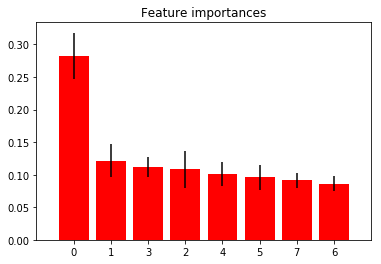

In [369]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [370]:
dottadata_test=pd.read_csv("D:/analytics/Hackathon/IIT_Hyd_Kings_Of_ML/dotta_test919.csv")

In [371]:
dottadata_test.head()

,user_id,id,num_games,hero_id,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,3,3_53,278,53,int,Ranged,Carry:Jungler:Pusher:Escape:Nuker,200,1.5,75,...,18,25,2.1,1.9,2.90,600,1125,1.70,290,0.6
1,4,4_17,180,17,int,Ranged,Carry:Escape:Nuker:Initiator:Disabler,200,1.5,75,...,22,24,1.8,1.5,3.00,480,1100,1.70,285,0.8
2,9,9_51,70,51,str,Melee,Initiator:Disabler:Durable:Nuker,200,1.5,75,...,13,17,3.2,2.3,1.30,150,900,1.70,315,0.6
3,10,10_54,189,54,str,Melee,Carry:Durable:Jungler:Escape:Disabler,200,1.5,75,...,18,15,3.1,1.9,1.75,150,900,1.85,315,1.0
4,15,15_74,263,74,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher,200,1.5,75,...,14,16,2.2,1.9,4.00,600,900,1.70,280,0.5


In [372]:
(dottadata_test.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

turn_rate                0
move_speed               0
id                       0
num_games                0
hero_id                  0
primary_attr             0
attack_type              0
roles                    0
base_health              0
base_health_regen        0
base_mana                0
base_mana_regen          0
base_armor               0
base_magic_resistance    0
base_attack_min          0
base_attack_max          0
base_strength            0
base_agility             0
base_intelligence        0
strength_gain            0
agility_gain             0
intelligence_gain        0
attack_range             0
projectile_speed         0
attack_rate              0
user_id                  0
dtype: int64

In [373]:
dottadata_testnum=dottadata_test.select_dtypes(include=[np.number]) # strategy 1 split the data frame into numeric and character data frame and values
dottadata_testcat=dottadata_test.select_dtypes(include=[object])

In [374]:
dottadata_testnum.head()

,user_id,num_games,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,3,278,53,200,1.5,75,0.9,1.0,25,30,...,18,25,2.1,1.9,2.90,600,1125,1.70,290,0.6
1,4,180,17,200,1.5,75,0.9,2.0,25,22,...,22,24,1.8,1.5,3.00,480,1100,1.70,285,0.8
2,9,70,51,200,1.5,75,0.9,0.0,25,28,...,13,17,3.2,2.3,1.30,150,900,1.70,315,0.6
3,10,189,54,200,1.5,75,0.9,-1.0,25,27,...,18,15,3.1,1.9,1.75,150,900,1.85,315,1.0
4,15,263,74,200,1.5,75,0.9,-1.0,25,19,...,14,16,2.2,1.9,4.00,600,900,1.70,280,0.5


In [375]:
dottadata_testcat.head()

,id,primary_attr,attack_type,roles
0,3_53,int,Ranged,Carry:Jungler:Pusher:Escape:Nuker
1,4_17,int,Ranged,Carry:Escape:Nuker:Initiator:Disabler
2,9_51,str,Melee,Initiator:Disabler:Durable:Nuker
3,10_54,str,Melee,Carry:Durable:Jungler:Escape:Disabler
4,15_74,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher


In [376]:
dottadataidtest=pd.concat([dottadata_testnum[["user_id","hero_id"]],dottadata_testcat[["id"]]],axis=1)

In [377]:
dottadataidtest.head()

,user_id,hero_id,id
0,3,53,3_53
1,4,17,4_17
2,9,51,9_51
3,10,54,10_54
4,15,74,15_74


In [378]:
dottadata_testnum=dottadata_testnum.drop(["user_id","hero_id"],axis=1)
dottadata_testcat=dottadata_testcat.drop(["id"],axis=1)

In [379]:
dottadata_testnum.head()

,num_games,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,278,200,1.5,75,0.9,1.0,25,30,44,19,18,25,2.1,1.9,2.90,600,1125,1.70,290,0.6
1,180,200,1.5,75,0.9,2.0,25,22,32,19,22,24,1.8,1.5,3.00,480,1100,1.70,285,0.8
2,70,200,1.5,75,0.9,0.0,25,28,30,26,13,17,3.2,2.3,1.30,150,900,1.70,315,0.6
3,189,200,1.5,75,0.9,-1.0,25,27,37,25,18,15,3.1,1.9,1.75,150,900,1.85,315,1.0
4,263,200,1.5,75,0.9,-1.0,25,19,25,16,14,16,2.2,1.9,4.00,600,900,1.70,280,0.5


In [380]:
dottadata_testcat.head()

,primary_attr,attack_type,roles
0,int,Ranged,Carry:Jungler:Pusher:Escape:Nuker
1,int,Ranged,Carry:Escape:Nuker:Initiator:Disabler
2,str,Melee,Initiator:Disabler:Durable:Nuker
3,str,Melee,Carry:Durable:Jungler:Escape:Disabler
4,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher


In [381]:
from sklearn.preprocessing import LabelEncoder

In [382]:
le=LabelEncoder()

In [383]:
dottadata_testcat1=dottadata_testcat.apply(le.fit_transform)

In [384]:
dottadata_testcat1.head()

,primary_attr,attack_type,roles
0,1,1,26
1,1,1,19
2,2,0,52
3,2,0,9
4,1,1,30


In [385]:
dottadata_testcat1=pd.DataFrame(preprocessing.normalize(dottadata_testcat1),columns = dottadata_testcat1.columns)

In [386]:
dottadata_testcat1.head()

,primary_attr,attack_type,roles
0,0.038405,0.038405,0.998524
1,0.052486,0.052486,0.997241
2,0.038433,0.000000,0.999261
3,0.216930,0.000000,0.976187
4,0.033296,0.033296,0.998891


In [387]:
dottadata_testnum1=pd.DataFrame(preprocessing.normalize(dottadata_testnum),columns = dottadata_testnum.columns)

In [388]:
dottadata_testnum1.head()

,num_games,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,0.205088,0.147545,0.001107,0.055329,0.000664,0.000738,0.018443,0.022132,0.032460,0.014017,0.013279,0.018443,0.001549,0.001402,0.002139,0.442635,0.829941,0.001254,0.213940,0.000443
1,0.142159,0.157955,0.001185,0.059233,0.000711,0.001580,0.019744,0.017375,0.025273,0.015006,0.017375,0.018955,0.001422,0.001185,0.002369,0.379091,0.868750,0.001343,0.225085,0.000632
2,0.070505,0.201444,0.001511,0.075541,0.000906,0.000000,0.025180,0.028202,0.030217,0.026188,0.013094,0.017123,0.003223,0.002317,0.001309,0.151083,0.906497,0.001712,0.317274,0.000604
3,0.187414,0.198322,0.001487,0.074371,0.000892,-0.000992,0.024790,0.026773,0.036690,0.024790,0.017849,0.014874,0.003074,0.001884,0.001735,0.148742,0.892449,0.001834,0.312357,0.000992
4,0.225062,0.171150,0.001284,0.064181,0.000770,-0.000856,0.021394,0.016259,0.021394,0.013692,0.011981,0.013692,0.001883,0.001626,0.003423,0.513450,0.770175,0.001455,0.239610,0.000428


In [389]:
dottadatadftest=pd.concat([dottadataidtest,dottadata_testnum1,dottadata_testcat1],axis=1)

In [390]:
dottadatadftest.head()

,user_id,hero_id,id,num_games,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,...,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate,primary_attr,attack_type,roles
0,3,53,3_53,0.205088,0.147545,0.001107,0.055329,0.000664,0.000738,0.018443,...,0.001402,0.002139,0.442635,0.829941,0.001254,0.213940,0.000443,0.038405,0.038405,0.998524
1,4,17,4_17,0.142159,0.157955,0.001185,0.059233,0.000711,0.001580,0.019744,...,0.001185,0.002369,0.379091,0.868750,0.001343,0.225085,0.000632,0.052486,0.052486,0.997241
2,9,51,9_51,0.070505,0.201444,0.001511,0.075541,0.000906,0.000000,0.025180,...,0.002317,0.001309,0.151083,0.906497,0.001712,0.317274,0.000604,0.038433,0.000000,0.999261
3,10,54,10_54,0.187414,0.198322,0.001487,0.074371,0.000892,-0.000992,0.024790,...,0.001884,0.001735,0.148742,0.892449,0.001834,0.312357,0.000992,0.216930,0.000000,0.976187
4,15,74,15_74,0.225062,0.171150,0.001284,0.064181,0.000770,-0.000856,0.021394,...,0.001626,0.003423,0.513450,0.770175,0.001455,0.239610,0.000428,0.033296,0.033296,0.998891


In [391]:
dottadatadftest.shape

(898, 26)

In [392]:
(dottadatadftest.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

roles                    0
attack_type              0
hero_id                  0
id                       0
num_games                0
base_health              0
base_health_regen        0
base_mana                0
base_mana_regen          0
base_armor               0
base_magic_resistance    0
base_attack_min          0
base_attack_max          0
base_strength            0
base_agility             0
base_intelligence        0
strength_gain            0
agility_gain             0
intelligence_gain        0
attack_range             0
projectile_speed         0
attack_rate              0
move_speed               0
turn_rate                0
primary_attr             0
user_id                  0
dtype: int64

In [393]:
X=dottadatadftest.drop(["user_id","hero_id","id","base_health", "base_health_regen", "base_mana","base_mana_regen", "base_magic_resistance","base_strength", "base_intelligence", "strength_gain", "intelligence_gain", "attack_rate","move_speed", "turn_rate", "roles","base_armor","base_attack_max"],axis=1)

In [394]:
X.head()

,num_games,base_attack_min,base_agility,agility_gain,attack_range,projectile_speed,primary_attr,attack_type
0,0.205088,0.022132,0.013279,0.001402,0.442635,0.829941,0.038405,0.038405
1,0.142159,0.017375,0.017375,0.001185,0.379091,0.868750,0.052486,0.052486
2,0.070505,0.028202,0.013094,0.002317,0.151083,0.906497,0.038433,0.000000
3,0.187414,0.026773,0.017849,0.001884,0.148742,0.892449,0.216930,0.000000
4,0.225062,0.016259,0.011981,0.001626,0.513450,0.770175,0.033296,0.033296


In [395]:
X.shape

(898, 8)

In [214]:
gbmpredict1=gbm.predict(X)

In [215]:
gbm.score(X,gbmpredict1)

1.0

In [216]:
np.sqrt(np.mean((gbmpredict1)**2))  # root mean square error

3196.5583611384918

In [70]:
DecTreepredict1=DecTree.predict(X)

In [71]:
DecTree.score(X,DecTreepredict1)

1.0

In [396]:
Randforpredict1=Randfor.predict(X)

In [397]:
pd.DataFrame(Randforpredict1).to_csv("D:/analytics/Hackathon/IIT_Hyd_Kings_Of_ML/Randforpredict1112f.csv") #converting to csv download from home of jupyter notebook then convert the values in csv to exp in csv using exp() the file will ne in local folder